# RFCML FEA Bending Modes

In [39]:
import numpy as np
import pandas as pd
import scipy.io

import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../')
from M1S_tools import *

from scipy.interpolate import griddata

plt.jet()

%matplotlib inline

<Figure size 640x480 with 0 Axes>

165
144001144.0
313001313.0
326001326.0
113001113.0
126001126.0


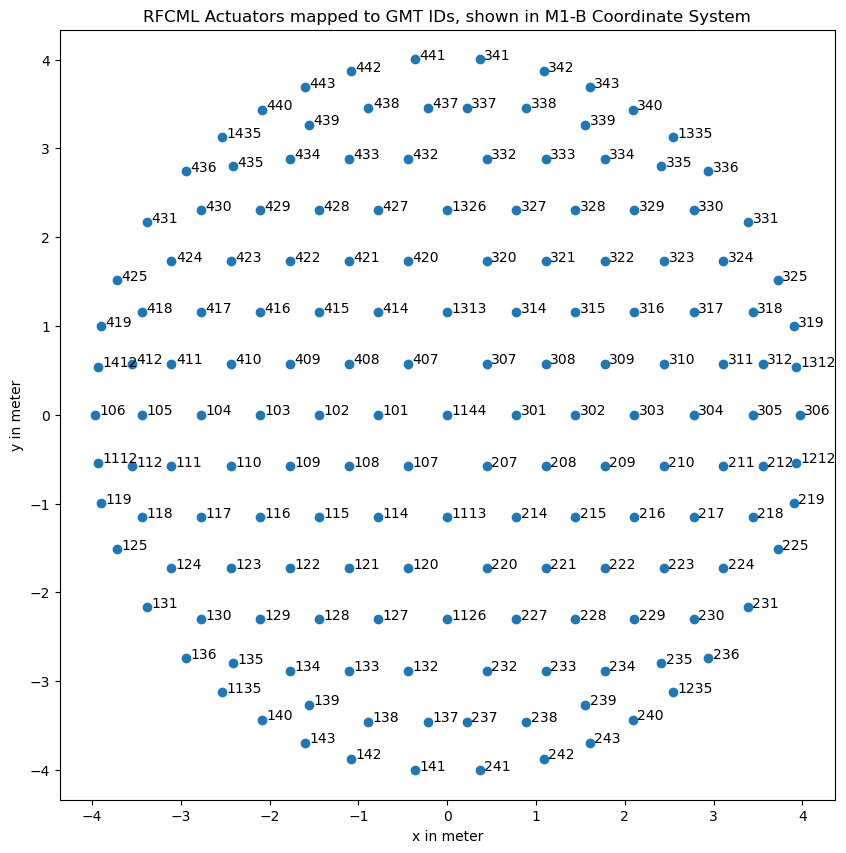

In [40]:
print(len(sax_ml))
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.scatter(sax_ml, say_ml)
#plt.scatter(sax_ml, say_ml, s=100, facecolors='none', edgecolors='k')
for i in range(len(sax_ml)):
    if saID_ml[i]<1e6:
        temp = saID_ml[i]
    else:
        print(saID_ml[i])
        temp = saID_ml[i]%1e6
    plt.text(sax_ml[i]+.05, say_ml[i], '%d'%(temp))
plt.axis('equal')
plt.xlabel('x in meter')
plt.ylabel('y in meter')
plt.title('RFCML Actuators mapped to GMT IDs, shown in M1-B Coordinate System');
#plt.grid()

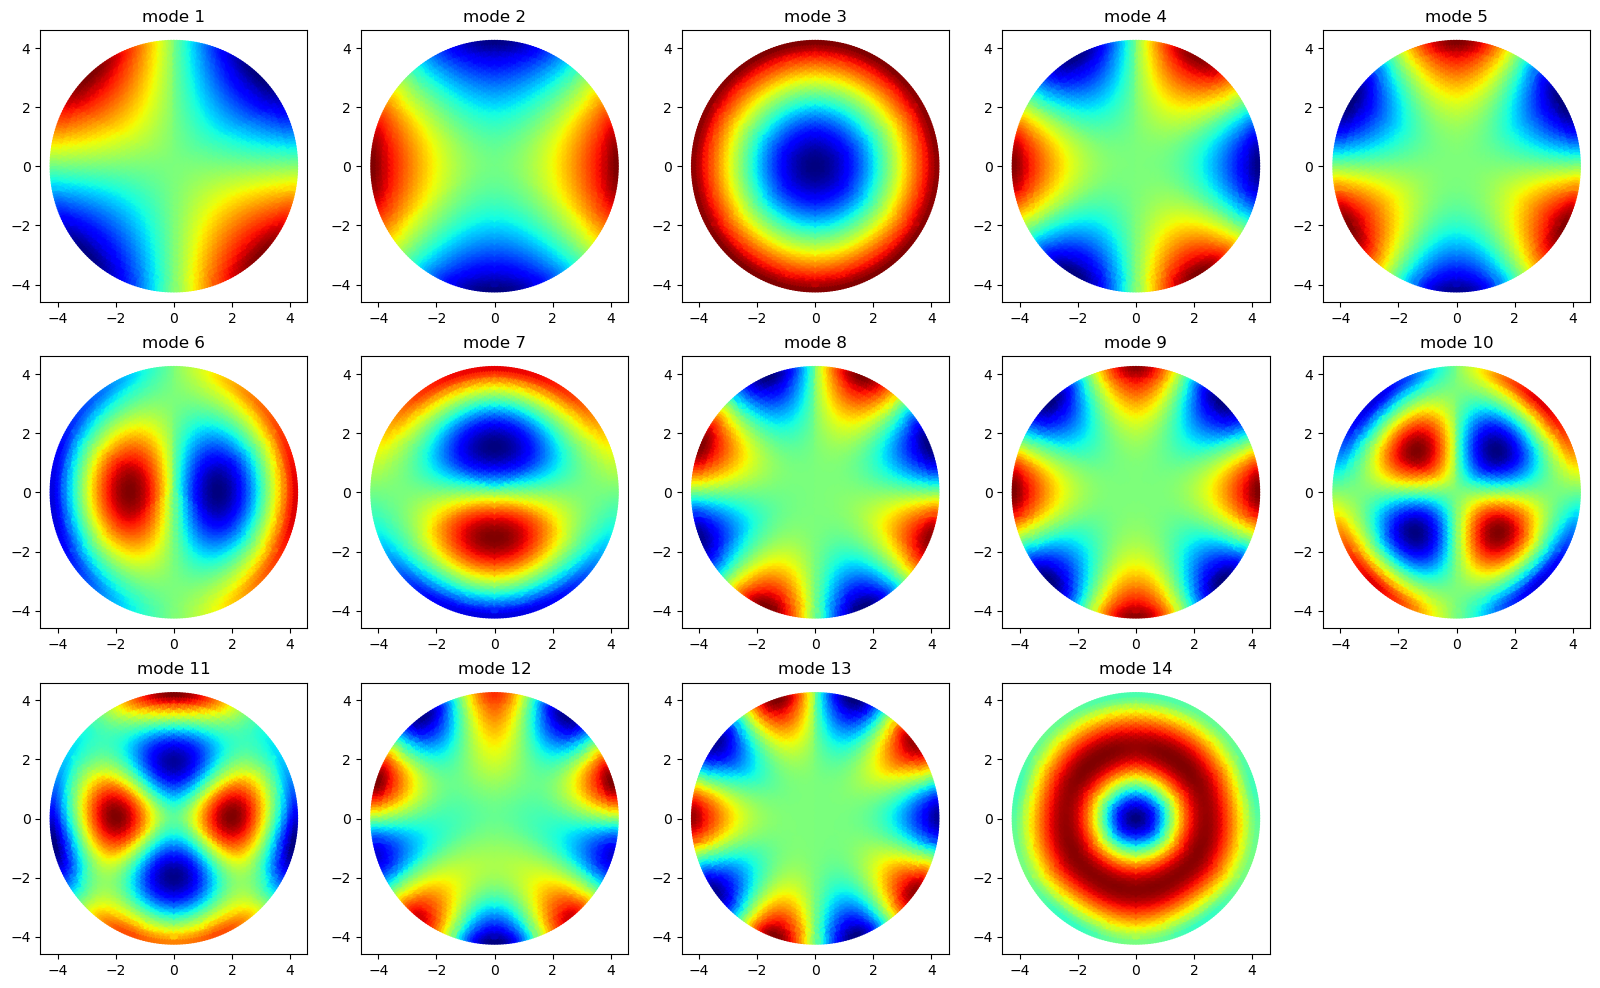

In [41]:
nrow = 3
mode_start = 1
mode_end = 14
fig, ax = plt.subplots(nrow,5,figsize=(20,4*nrow))
i = 0
for modeID in range(mode_start,mode_start+5*nrow):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    i += 1

    if modeID<=mode_end:
        img = ax[irow][icol].scatter(nodex_ml, nodey_ml,10, UMat_ml[:,modeID-1])
        ax[irow][icol].set_title('mode %d'%modeID)
    else:
        ax[irow][icol].axis('off')

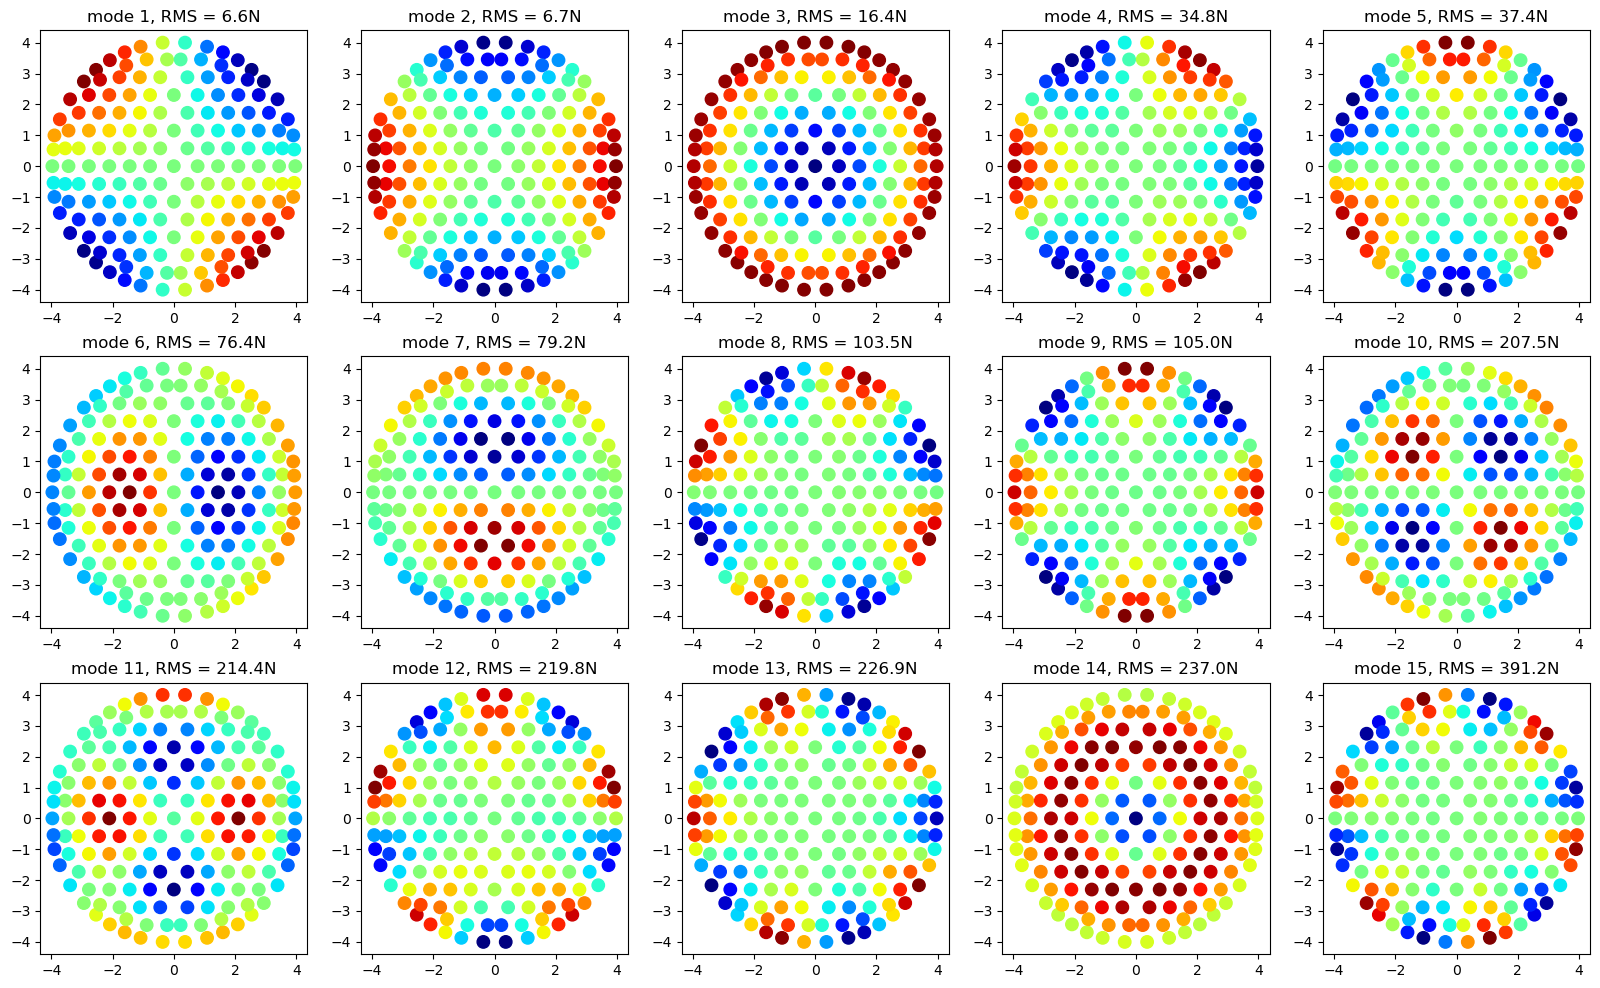

In [42]:
nrow = 3
fig, ax = plt.subplots(nrow,5,figsize=(20,4*nrow))
i = 0
for modeID in range(1,5*nrow+1):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    i += 1

    img = ax[irow][icol].scatter(sax_ml, say_ml,80, VMat_ml[:,modeID-1])
    ax[irow][icol].set_title('mode %d, RMS = %.1fN'%(modeID, np.std(VMat_ml[:,modeID-1])))

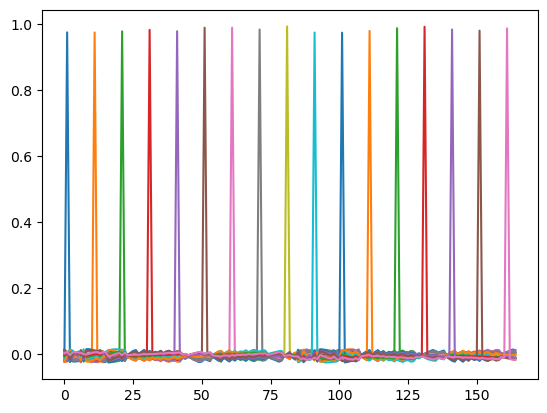

In [43]:
for i in np.arange(1,165,10):
    plt.plot(fv_ml[i,:])

### Let's try to verify that the RFCML unit load forces are linear distributions.

In [44]:
planar = fv_ml.copy()
planar[planar>0.8] = np.nan #remove the actuator with the unit force, so that the other forces can be visible.

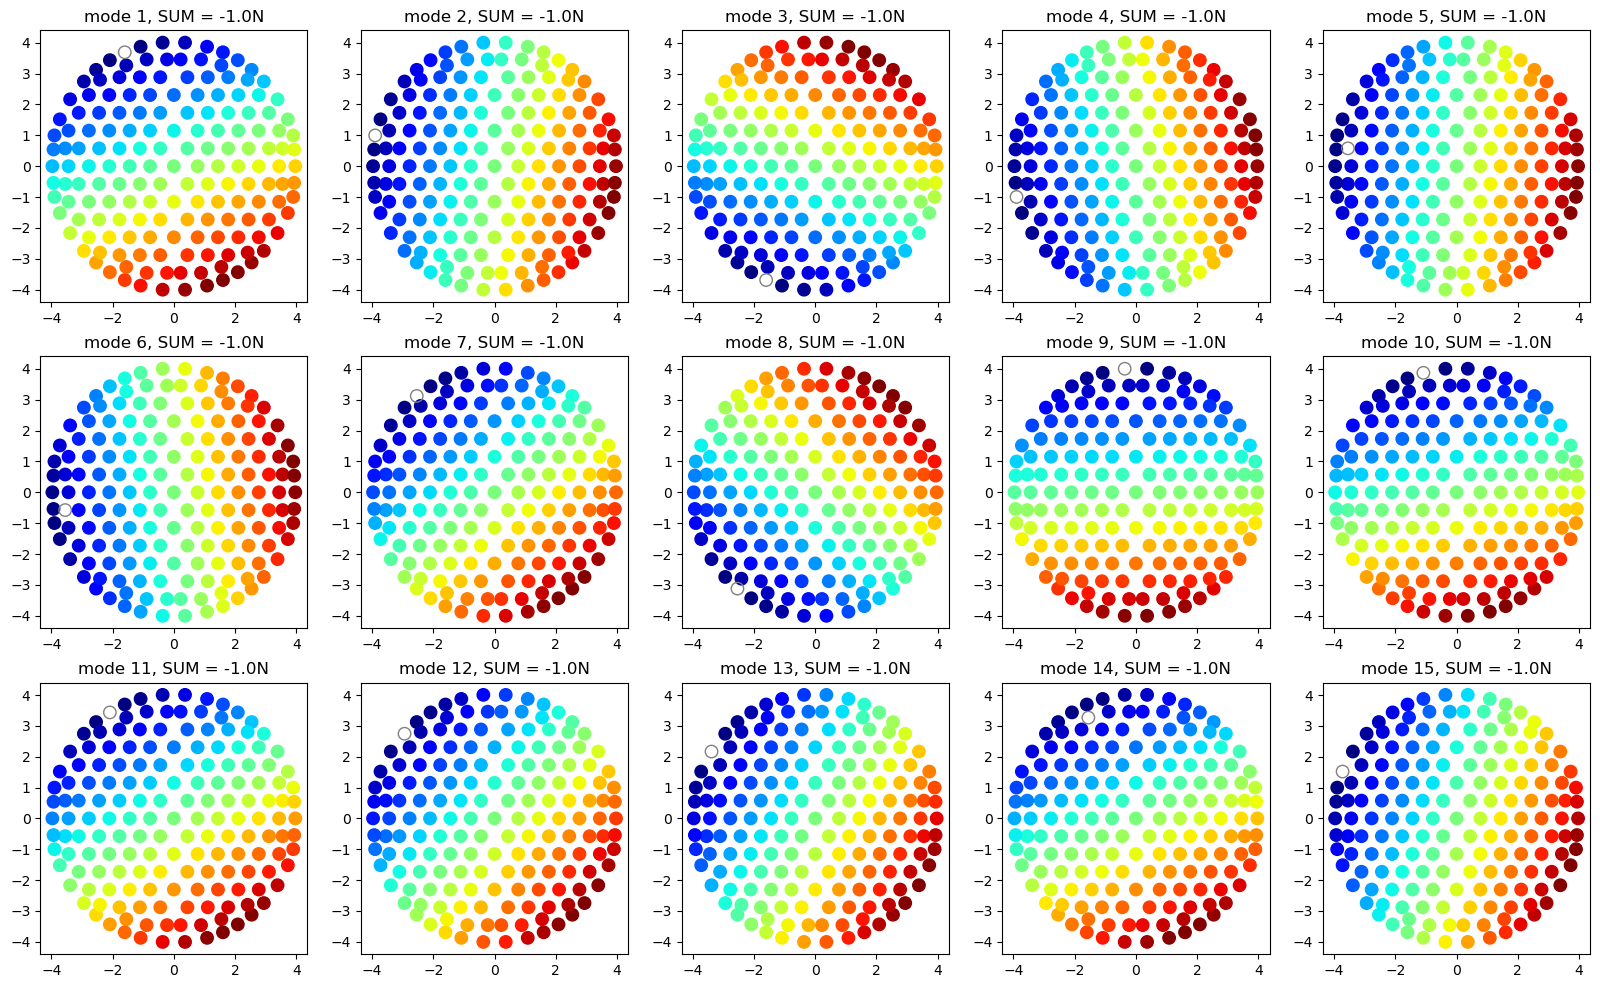

In [45]:
nrow = 3
fig, ax = plt.subplots(nrow,5,figsize=(20,4*nrow))
i = 0
for modeID in range(1,5*nrow+1):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    i += 1

    img = ax[irow][icol].scatter(sax_ml, say_ml,80, planar[modeID-1, :])
    idx = np.isnan(planar[modeID-1, :])
    ax[irow][icol].scatter(sax_ml[idx], say_ml[idx],80, edgecolors='grey', facecolors='none')
    ax[irow][icol].set_title('mode %d, SUM = %.1fN'%(modeID, np.sum(planar[modeID-1, ~idx])))

In [46]:
#check BM normalization
for i in np.arange(1,165,10):
    print('%.2f, %.2f, %+.2f'%(np.sqrt(np.sum(UMat_ml[:,i]**2)/UMat_ml.shape[0] ), 
          np.std(UMat_ml[:,i]), np.mean(UMat_ml[:,i])))

1.00, 1.00, -0.00
1.00, 1.00, -0.00
1.00, 1.00, -0.00
1.00, 1.00, -0.00
1.00, 1.00, -0.00
1.00, 1.00, -0.00
1.00, 1.00, -0.00
1.00, 1.00, +0.00
1.00, 1.00, -0.00
1.00, 1.00, +0.00
1.00, 1.00, -0.00
1.00, 1.00, -0.00
1.00, 1.00, +0.00
1.00, 1.00, -0.00
1.00, 1.00, +0.00
1.00, 1.00, -0.00
1.00, 1.00, -0.00


In [47]:
#check BM force normalization
for i in np.arange(0,16):
    print('%3d, %8.1f, %8.1f, %8.1f, %+.2f'%(i, np.sqrt(np.sum(VMat_ml[:,i]**2)/VMat_ml.shape[0] ), 
                                         np.sqrt(np.sum(VMat_ml[:,i]**2) ), 
          np.std(VMat_ml[:,i]), np.mean(VMat_ml[:,i])))

  0,      6.6,     85.0,      6.6, -0.00
  1,      6.7,     85.9,      6.7, -0.00
  2,     16.4,    210.3,     16.4, +0.00
  3,     34.8,    447.1,     34.8, +0.00
  4,     37.4,    480.7,     37.4, +0.00
  5,     76.4,    981.3,     76.4, +0.00
  6,     79.2,   1017.4,     79.2, -0.00
  7,    103.5,   1329.4,    103.5, +0.00
  8,    105.0,   1349.1,    105.0, +0.00
  9,    207.5,   2665.2,    207.5, +0.00
 10,    214.4,   2753.9,    214.4, -0.00
 11,    219.8,   2823.8,    219.8, -0.00
 12,    226.9,   2914.8,    226.9, +0.00
 13,    237.0,   3043.9,    237.0, +0.00
 14,    391.2,   5025.1,    391.2, -0.00
 15,    412.9,   5303.5,    412.9, -0.00


## Let's calculate the surface slopes of the bending modes

In [48]:
#BM surf nodes (as in the ML FEA) are not on a regular grid.
# this gives a approximate sense of grid size
np.sqrt(nodex_ml.shape[0])

83.61220006673668

In [49]:
pixSize = 100e-3 #100mm, so that 83 pixels cover 8.3m
vec = np.arange(np.min(nodex_ml), np.max(nodex_ml)+pixSize, pixSize)
xfit, yfit = np.meshgrid(vec, vec)
print(xfit.shape)
rfit = np.sqrt(xfit**2+yfit**2)
mask = np.ones_like(rfit)
mask[rfit>np.max(xfit)]=np.nan

(85, 85)


done


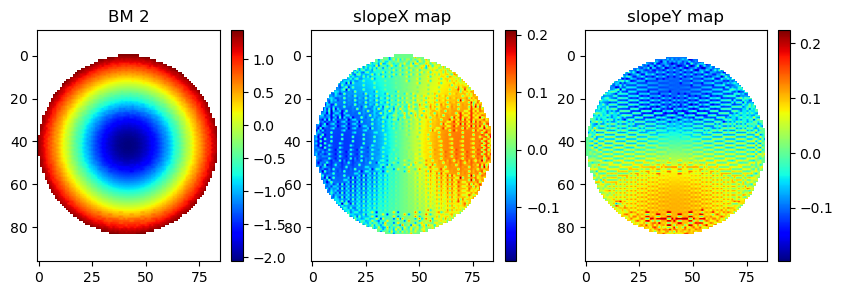

In [50]:
slopeMax = np.zeros(UMat_ml.shape[1])
slopeRms = np.zeros(UMat_ml.shape[1])
fig, ax = plt.subplots(1,3, figsize=(10,3))
for i in np.arange(46):
    #print(i, end = ' ')
    dd = griddata(np.hstack((nodex_ml, nodey_ml)), UMat_ml[:,i], (xfit, yfit), method='nearest')
    slopeX = dd*mask - np.roll(dd*mask,1,axis=1)
    slopeY = dd*mask - np.roll(dd*mask,1,axis=0)
    slope = np.sqrt(slopeX**2+slopeY**2)

    slopeMax[i] = np.max(slope[~np.isnan(slope)])
    slopeRms[i] = np.sqrt(np.mean((slope[~np.isnan(slope)]**2)))
    #print(slopeMax[i], slopeRms[i], np.std(slope[~np.isnan(slope)]))
    if i==2:
        img = ax[0].imshow(dd*mask)
        ax[0].axis('equal')
        ax[0].set_title('BM %d'%i)
        fig.colorbar(img, ax=ax[0]);

        img = ax[1].imshow(slopeX)
        ax[1].axis('equal')
        ax[1].set_title('slopeX map')
        fig.colorbar(img, ax=ax[1]);
        
        img = ax[2].imshow(slopeY)
        ax[2].axis('equal')
        ax[2].set_title('slopeY map')
        fig.colorbar(img, ax=ax[2]);
print('done')

In [51]:
slopeMax

array([0.21778015, 0.20650655, 0.23923238, 0.35493277, 0.34702987,
       0.39418266, 0.43700434, 0.48036811, 0.42696461, 0.55762574,
       0.54293518, 0.5993134 , 0.57612391, 0.63652305, 0.74456805,
       0.74362535, 0.60923588, 0.60849628, 0.87711626, 0.76856207,
       0.87058985, 0.88449392, 0.72166202, 0.79320918, 0.79675572,
       0.95135281, 1.22209649, 1.03397046, 0.99429906, 0.88642533,
       0.8181898 , 1.05214723, 1.10814985, 0.89865886, 1.1490876 ,
       1.17323997, 1.2375403 , 0.94087253, 1.04217953, 1.34698748,
       1.4288302 , 1.20256879, 1.23725918, 1.47240122, 1.25352445,
       1.73986896, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [52]:
slopeRms

array([0.08775895, 0.0870179 , 0.1127763 , 0.1186739 , 0.11648959,
       0.15328484, 0.14917728, 0.14381404, 0.14827069, 0.18390973,
       0.18944201, 0.17238188, 0.17528781, 0.1969322 , 0.20039316,
       0.20132909, 0.22410589, 0.21788294, 0.23751608, 0.2298394 ,
       0.2270773 , 0.22895952, 0.25248767, 0.25650663, 0.26663522,
       0.2738899 , 0.27686369, 0.25626284, 0.25469652, 0.28782973,
       0.28643574, 0.28228143, 0.30934911, 0.30210753, 0.3147656 ,
       0.29328391, 0.31399853, 0.32022159, 0.3185783 , 0.31314957,
       0.31255635, 0.33754209, 0.34435255, 0.3525744 , 0.35978214,
       0.35532493, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### We want the forces to be per puck, instead of per actuator

We need to map the ML force sets (165x1 vectors) to GMT force sets (170x1 vectors) then we can divide each actuator force by the number of pucks properly.

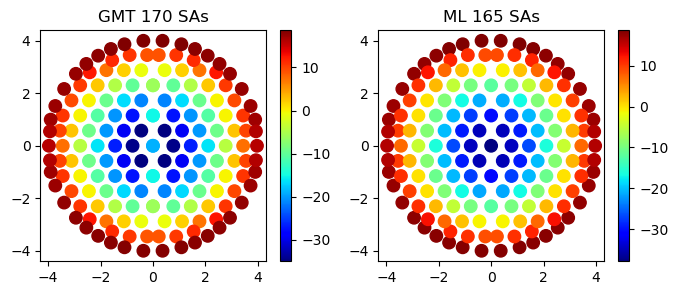

In [53]:
#if we want to use the ML forces, we need to convert them to be ready to be used by GMT software
#we therefore need a function: mlFvec2gmtFvec()
#below we check that they are visually the same, except a factor of 2 on the quads
#We are using BM3 as the example.
fig, ax = plt.subplots(1,2, figsize=(8,3))
aa = mlFvec2gmtFvec(VMat_ml[:,2])
img = ax[0].scatter(sax, say, 80, c=aa)
fig.colorbar(img, ax=ax[0])
ax[0].axis('equal')
ax[0].set_title('GMT 170 SAs')
img = ax[1].scatter(sax_ml, say_ml, 80, c=VMat_ml[:,2])
fig.colorbar(img, ax=ax[1])
ax[1].set_title('ML 165 SAs')
ax[1].axis('equal');

In [54]:
print(aa[np.array(dfSA['LSActType'])==5]) #10 acts under quads; GMT forces (aa) has 170 elements
print(VMat_ml[saID_ml>1e6,2]) #5 acts under quads; ML forces have 165 elements; each quad is sum of 2 SAs
print(sum(aa))
print(sum(VMat_ml[:,2]))

[-18.92463012 -15.13169159  -6.0083552  -15.20275209  -6.08107969
 -18.92463012 -15.13169159  -6.0083552  -15.20275209  -6.08107969]
[-37.84926023 -30.26338319 -12.0167104  -30.40550419 -12.16215939]
3.988785570552267e-05
3.9887855830755825e-05


## Ready to make a table

In [60]:
len()

46

In [58]:
c = np.ones_like(slopeMax)
print('modeID,  S RMS(nm),  S MAX(nm), F/puck RMS(N), F/puck MAX(N), slope RMS (nm/100mm), slope MAX (nm/100mm)')
for i in np.arange(46):
    gmtF = mlFvec2gmtFvec(VMat_ml[:,i])
    if i<14:
        c[i] = 0.5 #make 500nm surf RMS
    elif i<27:
        c[i] = 100./np.std(gmtF/npuck) #scale force down to 100N
    elif i<27:
        c[i] = 60./np.std(gmtF/npuck) #scale force down to 60N
    else:
        c[i] = 80./np.std(gmtF/npuck) #scale force down to 60N
    #overwrite c[i] above
    c[i] = np.min([147./np.max(abs(gmtF/npuck)), 0.5])
    
    #12/19/2024, Buddy's way of scaling
    scale_f_slope_max = 0.3/slopeMax[i] #what it takes to scale slope max to 300nm/100mm
    scale_f_s_rms = 0.5/np.std(UMat_ml[:,i]) #what it takes to scale surface rms to 500nm
    c[i] = min(scale_f_s_rms, scale_f_slope_max)
    
    print('%3d, %10.0f, %12.0f,    %8.0f,    %8.0f,           %8.0f,           %8.0f'%(i+1, #c[i],
                                        c[i]*1000*np.std(UMat_ml[:,i]), c[i]*1000*np.max(abs(UMat_ml[:,i])),
                                        c[i]*np.std(gmtF/npuck), c[i]*np.max(abs(gmtF/npuck)), 
                                        c[i]*1000*slopeRms[i], c[i]*1000*slopeMax[i]
                                       ))

modeID,  S RMS(nm),  S MAX(nm), F/puck RMS(N), F/puck MAX(N), slope RMS (nm/100mm), slope MAX (nm/100mm)
  1,        500,         1144,           2,           6,                 44,                109
  2,        500,         1152,           2,           6,                 44,                103
  3,        500,         1032,           4,           9,                 56,                120
  4,        500,         1253,          11,          34,                 59,                177
  5,        500,         1222,          10,          28,                 58,                174
  6,        500,         1113,          16,          48,                 77,                197
  7,        500,         1091,          17,          48,                 75,                219
  8,        500,         1307,          31,         108,                 72,                240
  9,        500,         1308,          29,         103,                 74,                213
 10,        500,         1093, 

In [62]:
VMat_ml.shape

(165, 165)

In [63]:
VMat[:,i]*c[i]

(170, 170)

In [64]:
## give these to Christoph for stress analysis
data = {}
data['ID'] = saID
for modeID in np.arange(1,47,1):
    i = modeID - 1
    #if we apply these scaling factors to RFCML bending modes
    #aa = np.round(mlFvec2gmtFvec(VMat_ml[:,i])*c[i],2)
    #data['BM %d forces (N)'%modeID] = aa
    #print('mode %d, coeff = %.3f, RMS = %.2f N, before scaling RMS = %.2f'%(modeID, 
    #                                                        c[i], np.std(aa), np.std(VMat_ml[:,i])))
    #Buddy has 165 acts, 1 under each quad. the force is 2*F. 
    
    #Chris will multiply my coefficients with GMT bending mode forces. 
    #the below makes sure forces tested with stress analysis are identical to what M1DCS applies
    aa = np.round(VMat[:,i]*c[i],2)
    data['BM %d forces (N)'%modeID] = aa
    print('mode %d, coeff = %.3f, RMS = %.2f N, before scaling RMS = %.2f'%(modeID, 
                                                            c[i], np.std(aa), np.std(VMat[:,i])))
    #GMT uses 170 SAs for VMat
df1 = pd.DataFrame(data)
df1.to_csv('../test_input_data/BendingForcesForStressTests.csv', index=False)

mode 1, coeff = 0.500, RMS = 2.78 N, before scaling RMS = 5.55
mode 2, coeff = 0.500, RMS = 2.81 N, before scaling RMS = 5.62
mode 3, coeff = 0.500, RMS = 7.64 N, before scaling RMS = 15.28
mode 4, coeff = 0.500, RMS = 15.32 N, before scaling RMS = 30.64
mode 5, coeff = 0.500, RMS = 16.07 N, before scaling RMS = 32.14
mode 6, coeff = 0.500, RMS = 34.43 N, before scaling RMS = 68.86
mode 7, coeff = 0.500, RMS = 36.69 N, before scaling RMS = 73.37
mode 8, coeff = 0.500, RMS = 46.26 N, before scaling RMS = 92.53
mode 9, coeff = 0.500, RMS = 47.05 N, before scaling RMS = 94.10
mode 10, coeff = 0.500, RMS = 94.07 N, before scaling RMS = 188.14
mode 11, coeff = 0.500, RMS = 99.72 N, before scaling RMS = 199.44
mode 12, coeff = 0.500, RMS = 100.62 N, before scaling RMS = 201.24
mode 13, coeff = 0.500, RMS = 104.05 N, before scaling RMS = 208.09
mode 14, coeff = 0.471, RMS = 105.65 N, before scaling RMS = 224.17
mode 15, coeff = 0.403, RMS = 147.47 N, before scaling RMS = 366.02
mode 16, coeff

In [22]:
modeID=14 #Larry asked about mode 14
i = modeID-1
gmtF = mlFvec2gmtFvec(VMat_ml[:,i])

112.74691633534235


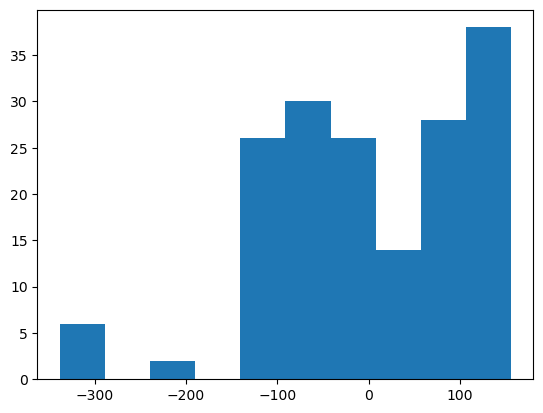

In [23]:
plt.hist(gmtF*0.5)
print(np.std(gmtF)*0.5); #we use 0.5 microns for BM testing
#the force RMS is a little different from the RMS at the beginning of this notebook, b/c we have split the quad forces.

47.35863787081256
51.84513900718323
-115.38051465597474


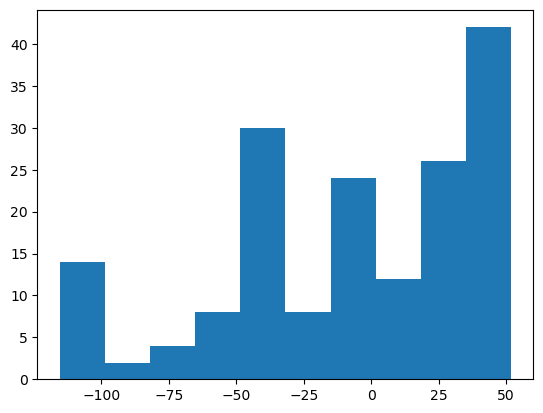

In [24]:
plt.hist(gmtF/npuck*0.5)
print(np.std(gmtF/npuck)*0.5); 
print(np.max(gmtF/npuck)*0.5); 
print(np.min(gmtF/npuck)*0.5); 

## We deal with the single actuator IFs next

In [25]:
IF_ml = Afn_ml @ fv_ml

In [26]:
saID_ml.shape

(165,)

In [28]:
TR_IDs = np.loadtxt('../test_input_data/SA_ID_for_IF.txt')
print(len(TR_IDs))
#this list double counts the quads

18


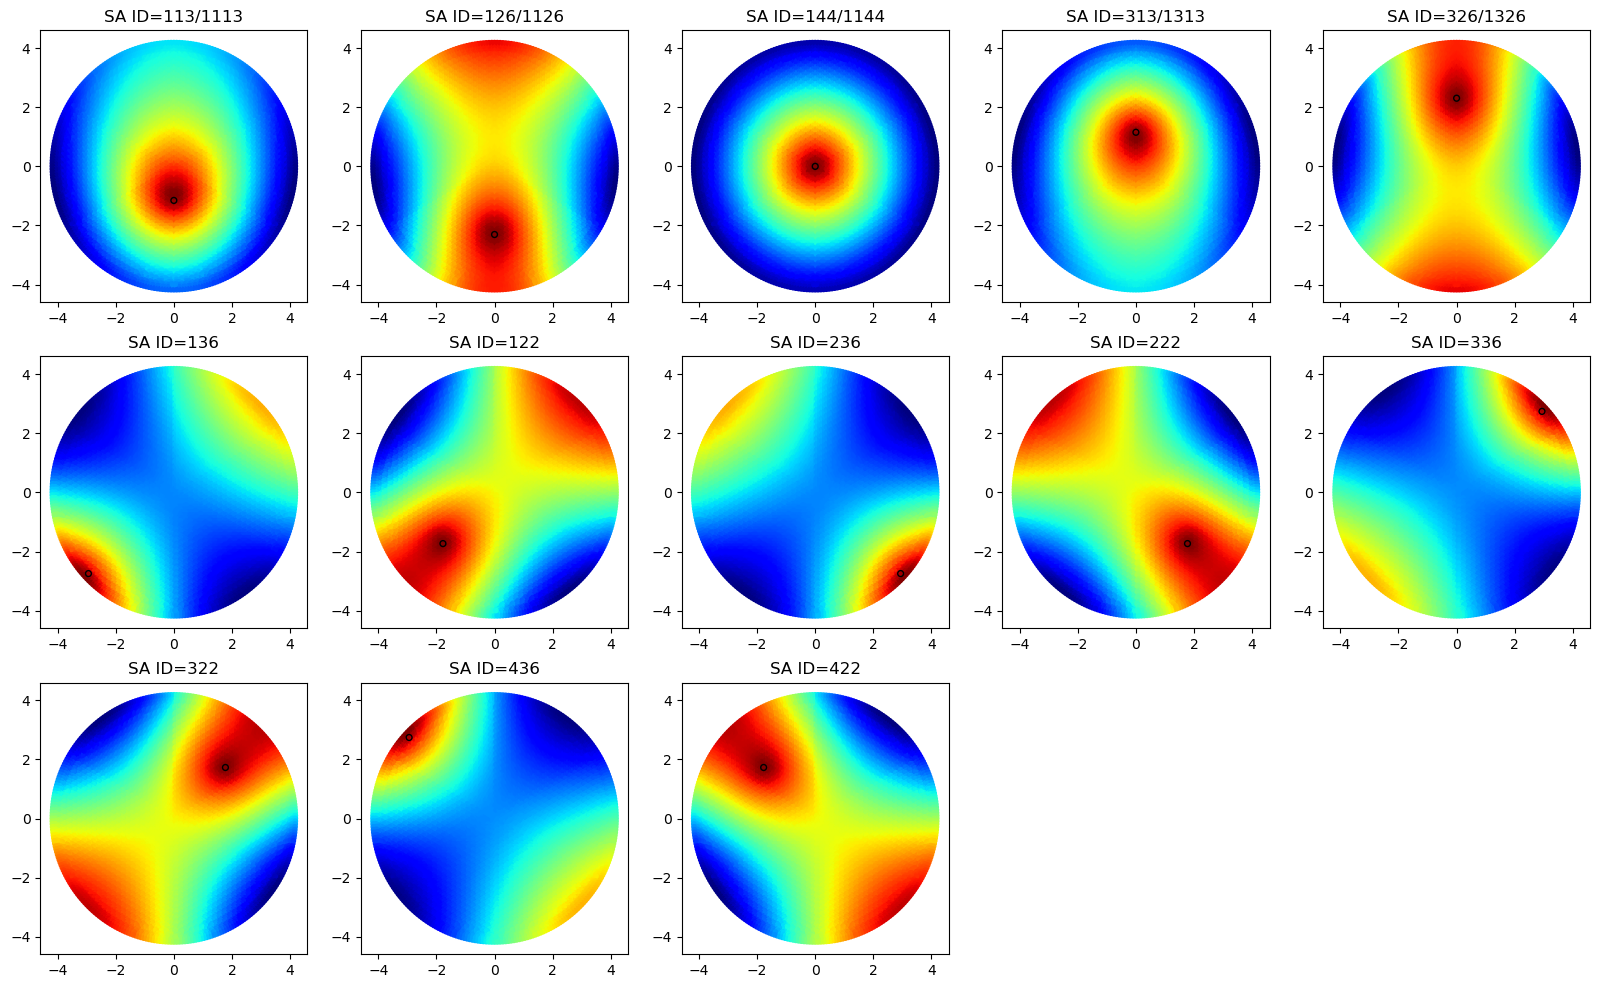

In [29]:
nrow = 3
fig, ax = plt.subplots(nrow,5,figsize=(20,4*nrow))
i = 0
for mysaID in TR_IDs:
    if mysaID < 1000:
        modeID_ml = saID2mlModeID(mysaID)
        irow = np.int8(i/5)
        icol = np.mod(i,5)
        i += 1

        img = ax[irow][icol].scatter(nodex_ml, nodey_ml,10, IF_ml[:,modeID_ml-1])
        if saID_ml[modeID_ml-1] < 1e6:
            ax[irow][icol].set_title('SA ID=%d'%saID_ml[modeID_ml-1])
        else:
            ax[irow][icol].set_title('SA ID=%d/%d'%(saID_ml[modeID_ml-1]//1e6, np.mod(saID_ml[modeID_ml-1], 1e6)))
        circle = plt.Circle((sax_ml[modeID_ml-1], say_ml[modeID_ml-1]),0.1, fill=False)
        ax[irow][icol].add_artist(circle)
endMode = i
for i in range(endMode, nrow*5):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    ax[irow][icol].axis('off')

(165,)
84 85 81 82 83 20 66 105 151 97 120 12 35 done


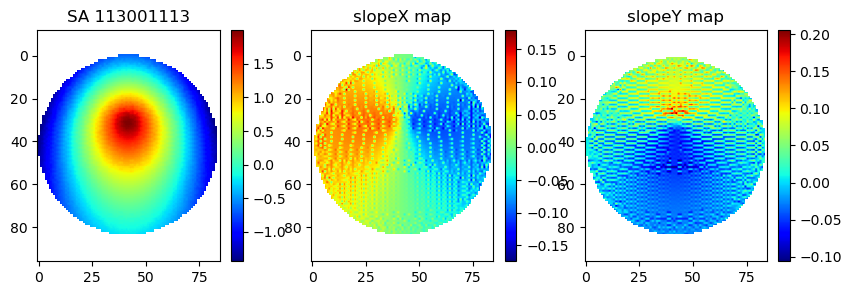

In [30]:
slopeMax = np.zeros(IF_ml.shape[1])
slopeRms = np.zeros(IF_ml.shape[1])
print(slopeMax.shape)
#we will be partially populating the arrays above
fig, ax = plt.subplots(1,3, figsize=(10,3))
for mysaID in TR_IDs:

    if mysaID<1000:
        modeID_ml = saID2mlModeID(mysaID)
        print(modeID_ml, end = ' ')

        dd = griddata(np.hstack((nodex_ml, nodey_ml)), IF_ml[:,modeID_ml-1], (xfit, yfit), method='nearest')
        slopeX = dd*mask - np.roll(dd*mask,1,axis=1)
        slopeY = dd*mask - np.roll(dd*mask,1,axis=0)
        slope = np.sqrt(slopeX**2+slopeY**2)

        slopeMax[modeID_ml-1] = np.max(slope[~np.isnan(slope)])
        slopeRms[modeID_ml-1] = np.sqrt(np.mean((slope[~np.isnan(slope)]**2)))
        #print(slopeMax[i], slopeRms[i], np.std(slope[~np.isnan(slope)]))
    if mysaID==113: #pick an example for visualization
        img = ax[0].imshow(dd*mask)
        ax[0].axis('equal')
        ax[0].set_title('SA %d'%saID_ml[modeID_ml-1])
        fig.colorbar(img, ax=ax[0]);

        img = ax[1].imshow(slopeX)
        ax[1].axis('equal')
        ax[1].set_title('slopeX map')
        fig.colorbar(img, ax=ax[1]);
        
        img = ax[2].imshow(slopeY)
        ax[2].axis('equal')
        ax[2].set_title('slopeY map')
        fig.colorbar(img, ax=ax[2]);
print('done')

In [31]:
c = np.ones_like(slopeMax)
c *= 300 #350N force on each
temp1 = ''
print('SA ID,  Unit F (N), F/puck RMS(N), F/puck MAX(N), S RMS(nm),  S MAX(nm), slope MAX (nm/100mm), slope RMS (nm/100mm)')
for mysaID in TR_IDs:
    skiprow = False
    modeID_ml = saID2mlModeID(mysaID)
    gmtF = mlFvec2gmtFvec(fv_ml[:,modeID_ml-1])
    #if i<9:
    #    c[i] = 0.5 #make 500nm surf RMS
    #elif i<18:
    #    c[i] = 100./np.std(VMat_ml[:,i]) #scale force down to 100N
    #elif i<27:
    #    c[i] = 60./np.std(VMat_ml[:,i]) #scale force down to 60N
    #else:
    #    c[i] = 40./np.std(VMat_ml[:,i]) #scale force down to 60N
    
    #RFCML mode shapes are in nanometers
    if saID_ml[modeID_ml-1] > 1e6:
        temp = '%d/%d'%(saID_ml[modeID_ml-1]//1e6, np.mod(saID_ml[modeID_ml-1], 1e6))
        if temp1 == temp:
            skiprow = True
        temp1 = temp
    else:
        temp = '%d'%saID_ml[modeID_ml-1]
    if not skiprow:
        print('%8s, %6.1f, %8.0f,      %8.0f,    %8.0f,    %8.0f,      %8.0f,           %8.0f'%(temp, 
                                                                                  c[modeID-1],
                                                    c[modeID-1]*np.sqrt(np.mean((gmtF/npuck)**2)), 
                                                    c[modeID-1]*np.max(gmtF/npuck), 
                                                   c[modeID-1]*np.std(IF_ml[:,modeID_ml-1]), 
                                                    c[modeID-1]*np.max(IF_ml[:,modeID_ml-1]),
                                                    c[modeID-1]*slopeMax[modeID_ml-1], 
                                                    c[modeID-1]*slopeRms[modeID_ml-1]
                                                   ))

SA ID,  Unit F (N), F/puck RMS(N), F/puck MAX(N), S RMS(nm),  S MAX(nm), slope MAX (nm/100mm), slope RMS (nm/100mm)
113/1113,  300.0,        8,            74,         226,         600,            66,                 25
126/1126,  300.0,        8,            74,         248,         480,            77,                 24
144/1144,  300.0,        8,            75,         259,         711,            63,                 29
313/1313,  300.0,        8,            74,         225,         598,            58,                 25
326/1326,  300.0,        8,            74,         246,         475,            57,                 23
     136,  300.0,       11,           146,         561,        2003,           248,                 52
     122,  300.0,        8,            99,         258,         502,            55,                 24
     236,  300.0,       11,           146,         561,        2003,           178,                 52
     222,  300.0,        8,            99,         258,     

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


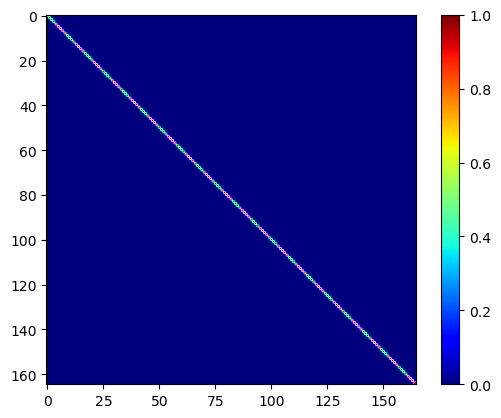

In [32]:
#verify unitarity of the U matrix
plt.imshow(UMat_ml.transpose() @ UMat_ml/UMat_ml.shape[0])
plt.colorbar();

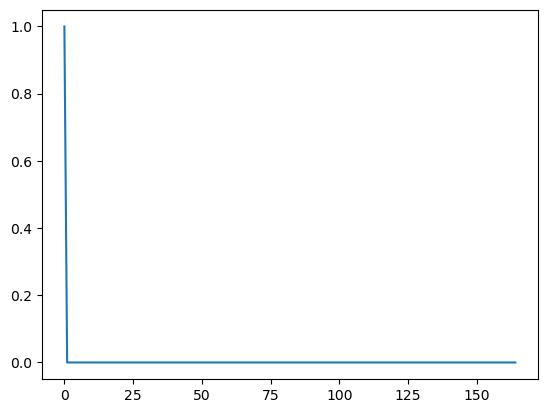

In [33]:
#if we decompose BM 1 into BMs, we should get [1, 0, 0, ...., 0]
aa = UMat_ml.transpose() /UMat_ml.shape[0] @UMat_ml[:,0]
plt.plot(aa)

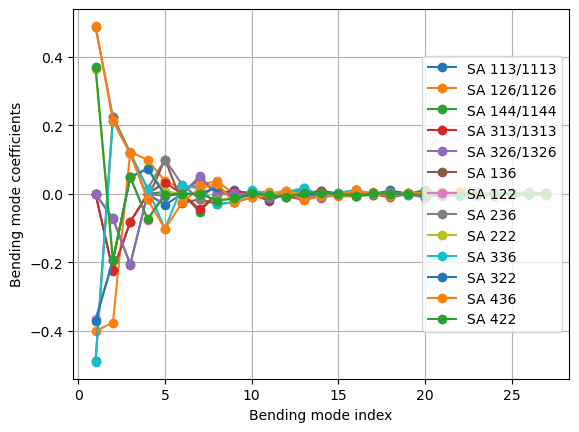

In [37]:
coeff = []
temp1 = ''
for i,mysaID in enumerate(TR_IDs):
    skiprow = False
    modeID_ml = saID2mlModeID(mysaID)
    
    #IF_ml is in nanometer. bending modes have been converted into microns
    aa = UMat_ml.transpose() /UMat_ml.shape[0] @ (IF_ml[:,modeID_ml]*1e-3*c[modeID-1])
    if saID_ml[modeID_ml-1] > 1e6:
        temp = '%d/%d'%(saID_ml[modeID_ml-1]//1e6, np.mod(saID_ml[modeID_ml-1], 1e6))
        if temp1 == temp:
            skiprow = True
        temp1 = temp
    else:
        temp = '%d'%saID_ml[modeID_ml-1]
        
    if not skiprow:
        coeff.append(aa[:27])
        plt.plot(np.arange(1,27+1), aa[:27],'-o', label='SA %s'%temp)
plt.xlabel('Bending mode index')
plt.ylabel('Bending mode coefficients')
plt.legend(loc='right')
plt.grid();

coeff = np.array(coeff)

In [38]:
coeff.shape

(13, 27)

In [65]:
np.savetxt('../test_input_data/SA_IF_BM_coeff.txt', coeff)